In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [38]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [46]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3
1,23458,75327,2021-01-24,관악구,-,타시도 확진자 접촉,치료중,21-01,21-01-24,1,3
2,23457,75378,2021-01-24,관악구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3
3,23456,75369,2021-01-24,종로구,-,병원 및 요양시설,치료중,21-01,21-01-24,1,3
4,23455,75356,2021-01-24,강동구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3
...,...,...,...,...,...,...,...,...,...,...,...
23454,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5
23455,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5
23456,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5
23457,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5


In [56]:
import datetime

def GetWeekFirstDate(sourceDate):
    weekDayCount = sourceDate.weekday()
    targetDate = sourceDate - datetime.timedelta(days=weekDayCount);
    return targetDate

df['년주'] = df['확진일'].apply(lambda x : GetWeekFirstDate(datetime.datetime.strptime(x,'%Y-%m-%d')).strftime("%Y-%V"))

In [15]:
# df["년주"] = df["확진일"].dt.strftime("%y")+ "-" + df["확진일"].dt.week.astype(str)
# df["년주"]

In [57]:
day_count = df["확진일"].value_counts().head(10)
day_count

2020-12-17    586
2020-12-24    566
2020-12-28    525
2020-12-25    431
2020-12-16    426
2020-12-12    392
2020-12-29    387
2020-12-18    385
2020-12-15    380
2020-12-22    375
Name: 확진일, dtype: int64

In [58]:
year_month = df["년월"].value_counts().sort_index()
year_month

20-01        7
20-02       80
20-03      391
20-04      156
20-05      229
20-06      459
20-07      281
20-08     2415
20-09     1306
20-10      733
20-11     2903
20-12    10426
21-01     4073
Name: 년월, dtype: int64

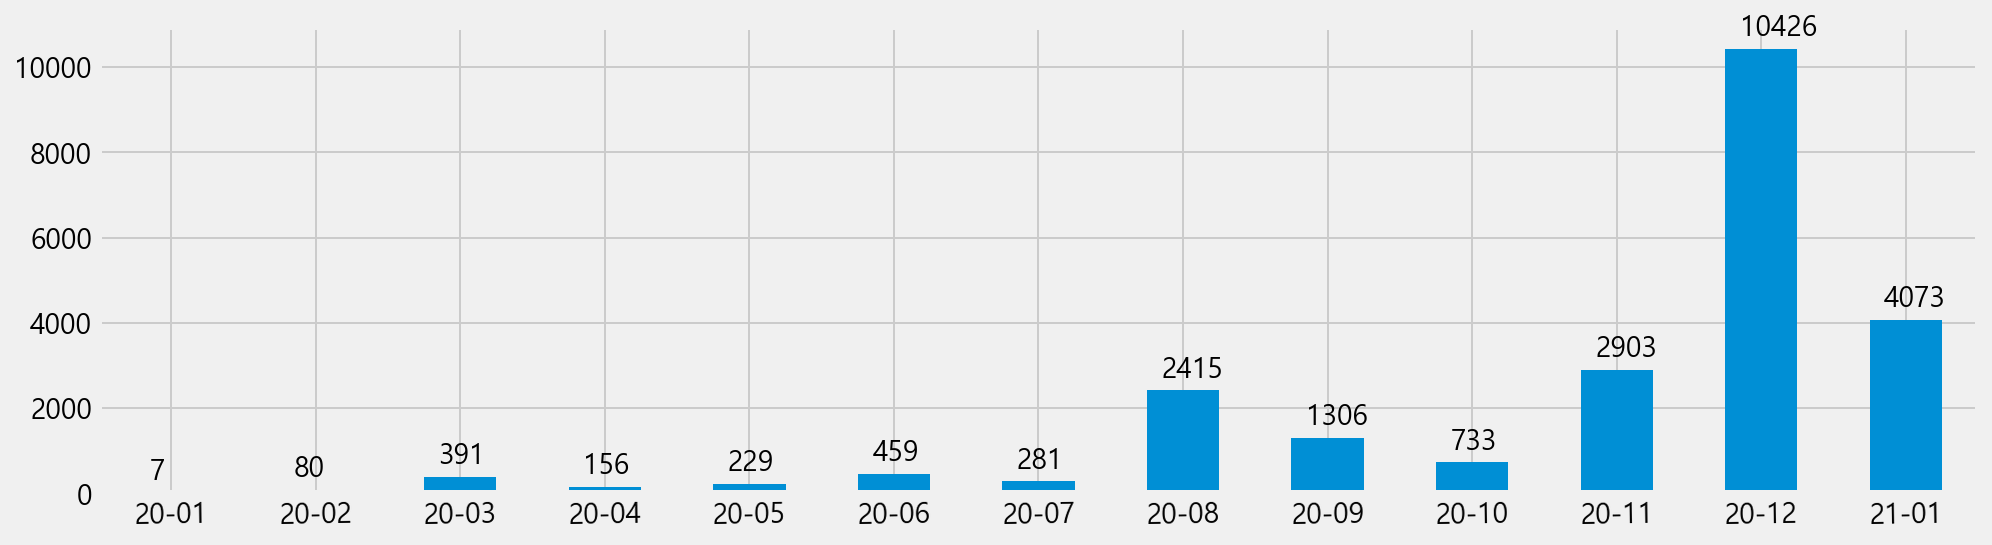

In [59]:
year_month_g = df["년월"].value_counts().sort_index().plot.bar(figsize=(15,4),rot=1)
for i in range (len(year_month)):
    count = year_month.iloc[i]
    year_month_g.text(x=i-0.15,y=count+300,s=count)

In [60]:
week_count = df.groupby(["년월", "년주"])["연번"].count()
week_count

년월     년주     
20-01  2020-04       1
       2020-05       6
20-02  2020-05       1
       2020-06       4
       2020-07       2
                  ... 
20-12  2020-53    1633
21-01  2020-53     769
       2021-01    1456
       2021-02    1002
       2021-03     846
Name: 연번, Length: 64, dtype: int64

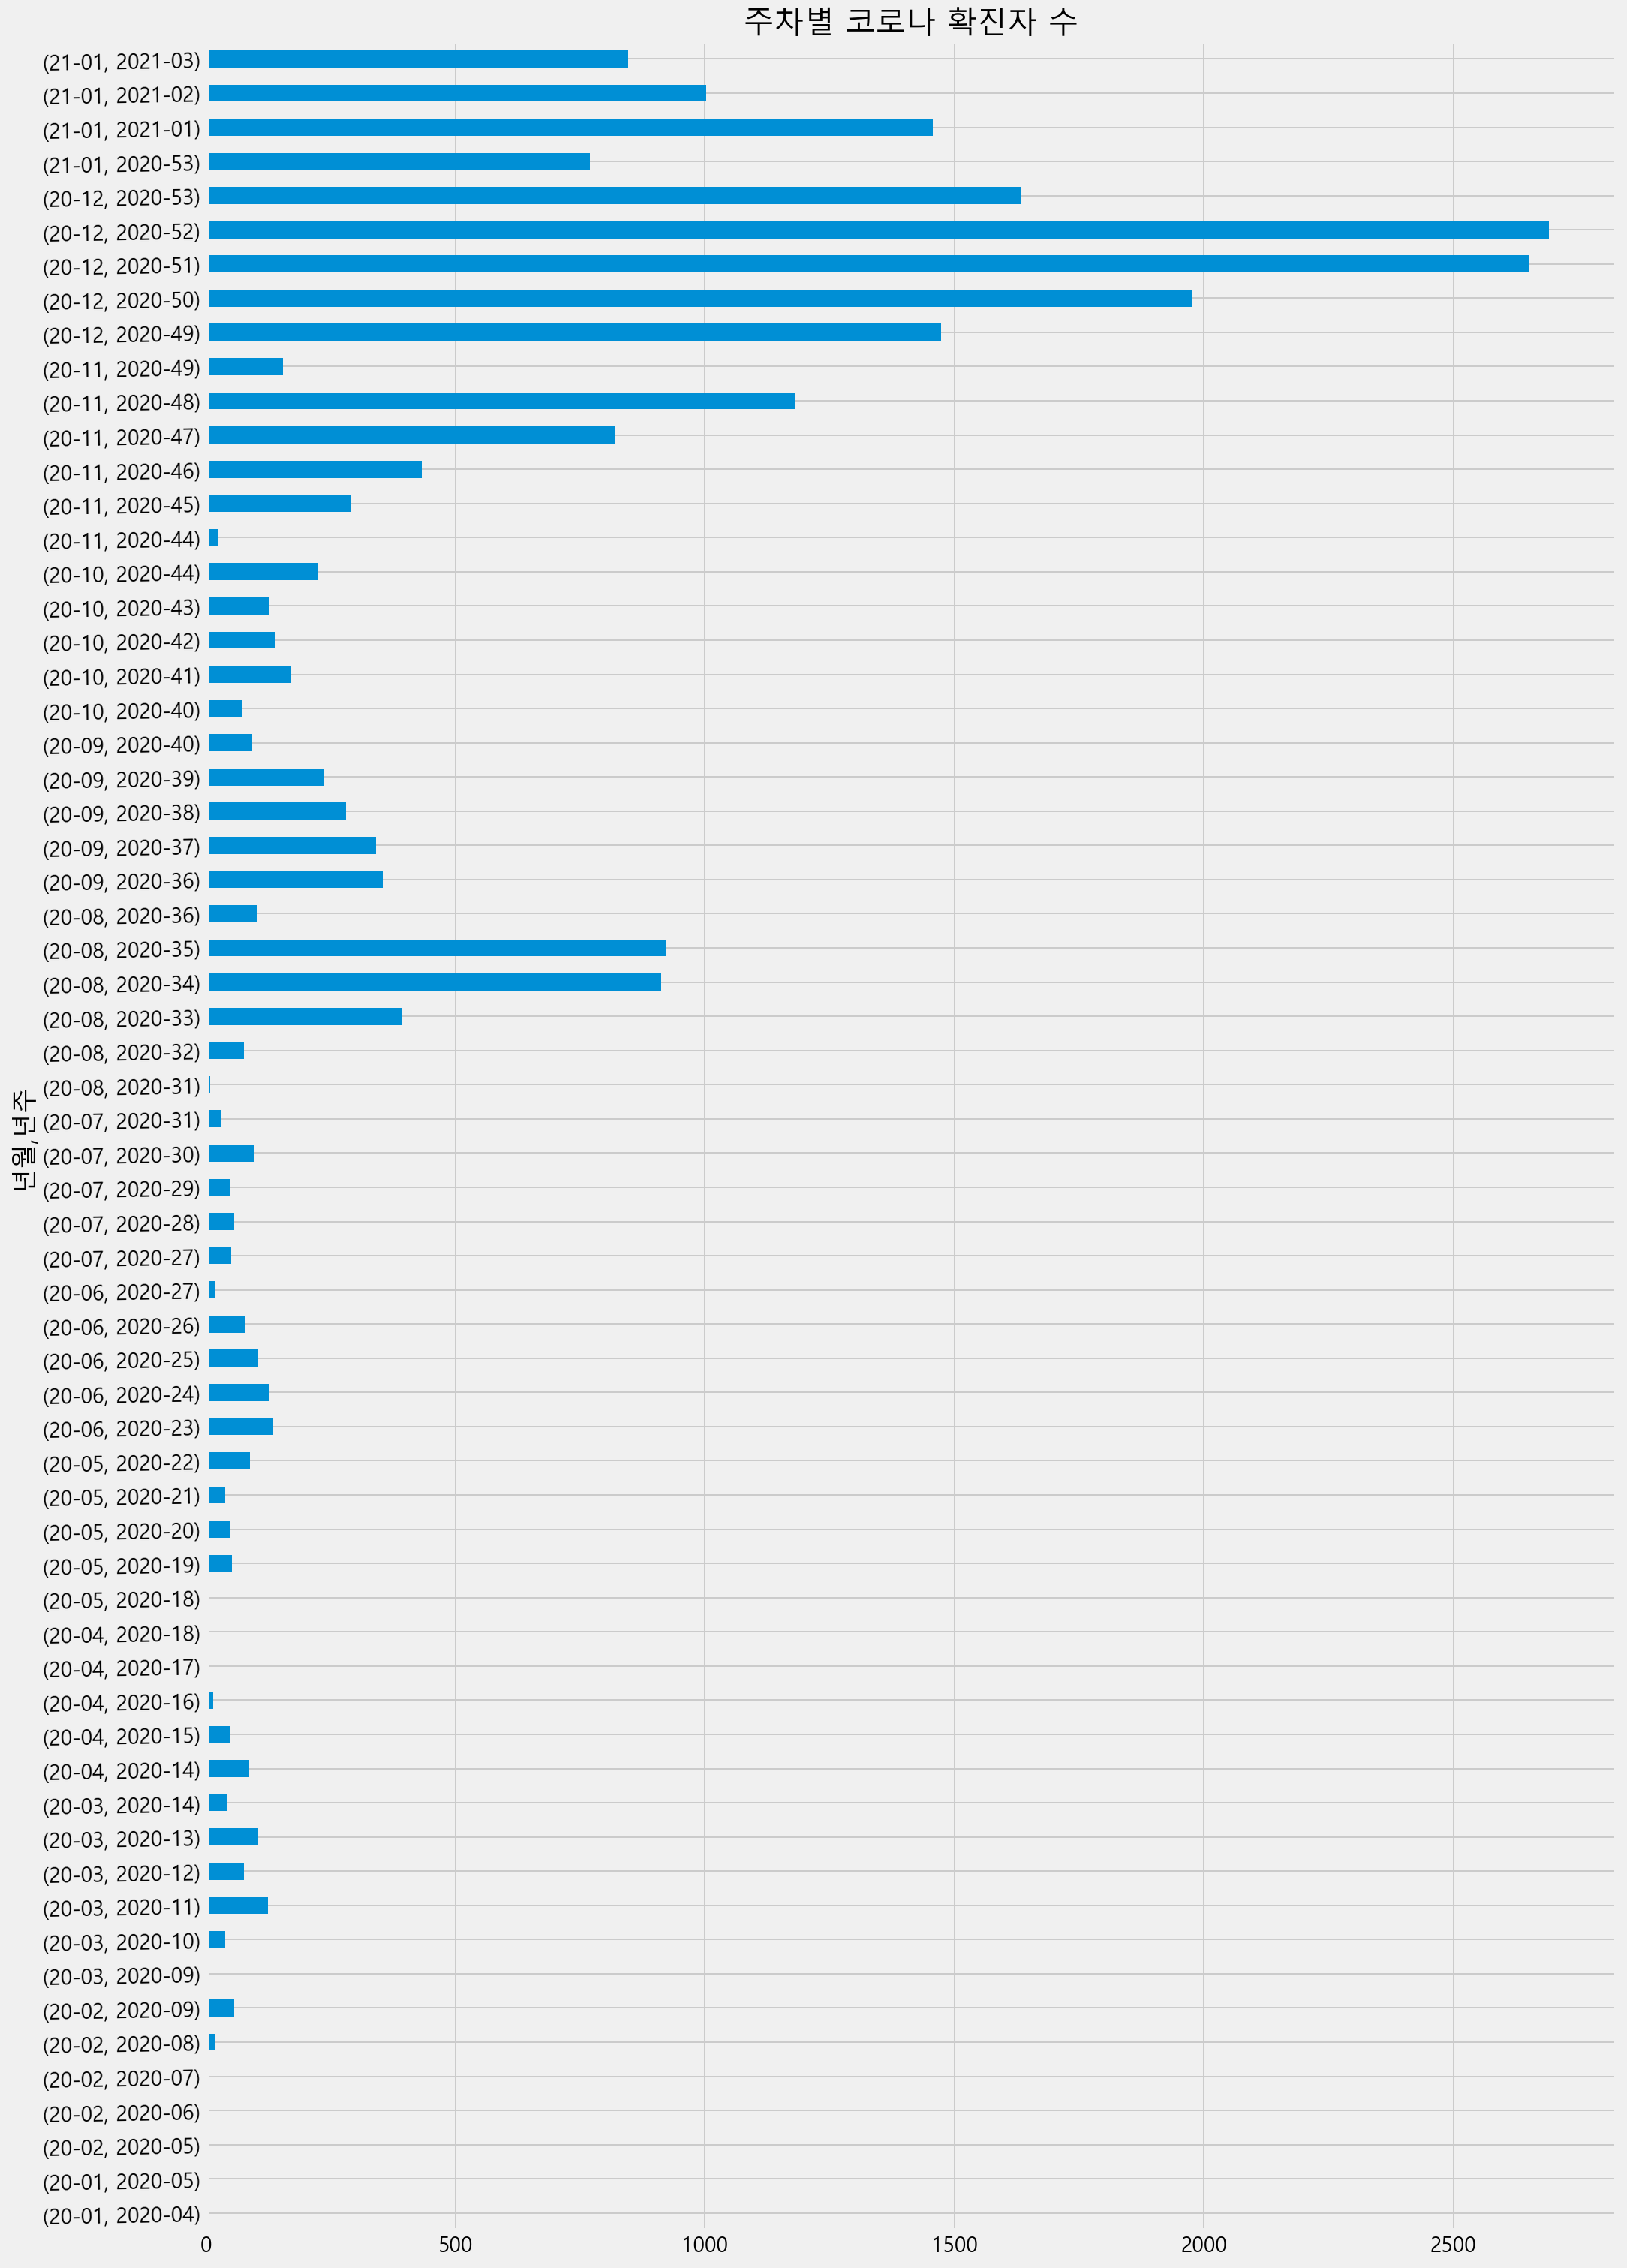

In [61]:
week_count_g = week_count.plot.barh(figsize=(15,25),rot=1,title="주차별 코로나 확진자 수")